<img src = 'snoopdogg.png', width = 300 X 100>

## 1) Tweeter Mining

In [32]:
import os
import pandas as pd
import numpy as np

In [33]:
import os

class EmojiDict(object):

    def __init__(self):

        #loads the emoji table in the data folder in the package
        file_path = os.path.dirname(os.path.abspath(__file__))
        emoji_key = pd.read_csv(file_path + '/data/' + 'emoji_table.txt', encoding='utf-8', index_col=0)

        #loads the diversity table
        diversity_df = pd.read_csv(file_path + '/data/' + 'diversity_table.txt', encoding='utf-8', index_col=0)
        
        #intialize emoji count
        emoji_key['count'] = 0
        emoji_dict = emoji_key['count'].to_dict()
        emoji_dict_total = emoji_key['count'].to_dict()

        #initialize diversity analysis
        diversity_df['count'] = 0
        diversity_keys = diversity_df['count'].to_dict().keys()
        human_emoji = []

        for emoji in diversity_keys:

            emoji = emoji.replace(u'\U0001f3fb', '')
            emoji = emoji.replace(u'\U0001f3fc', '')
            emoji = emoji.replace(u'\U0001f3fd', '')
            emoji = emoji.replace(u'\U0001f3fe', '')
            emoji = emoji.replace(u'\U0001f3ff', '')

            human_emoji.append(emoji)

        human_emoji_unique = list(set(human_emoji))
        human_emoji_dict = {}

        for emoji in human_emoji_unique:

            human_emoji_dict[emoji] = 0

        #self define
        self.dict = emoji_dict
        self.dict_total = emoji_dict_total
        self.emoji_list = emoji_dict.keys()
        self.baskets = []
        self.total_emoji = 0
        self.total_indiv_emoji = 0

        self.skin_tones = ['\U0001f3fb', '\U0001f3fc', '\U0001f3fd', '\U0001f3fe', '\U0001f3ff']
        self.skin_tones_dict = {'human_emoji': 0, '\U0001f3fb':0, '\U0001f3fc':0, '\U0001f3fd': 0, '\U0001f3fe':0, '\U0001f3ff':0}
        self.human_emoji = human_emoji_unique
        self.human_emoji_dict = human_emoji_dict



    def add_emoji_count(self, text):

        #increments a count if an emoji as present
        emoji_basket = []

        for emoji in self.emoji_list:

            if emoji in text:
                self.dict[emoji] += 1
                emoji_basket.append(emoji)

            self.dict_total[emoji]  += text.count(emoji)
            self.total_indiv_emoji += text.count(emoji)

        human_emoji_count = 0
        for emoji in self.human_emoji:

            if emoji in text:

                human_emoji_count += 1
                self.skin_tones_dict['human_emoji'] += 1

                for tone in self.skin_tones:

                    if emoji.encode('unicode-escape')+tone in text.encode('unicode-escape'):

                        self.skin_tones_dict[tone] += 1



        if len(emoji_basket) > 0:
            self.total_emoji += 1


        self.baskets.append(emoji_basket)

        return


    def create_csv(self, file='emoji_out.csv', total=False):


        emoji_df_total = self.dict_total.items()
        emoji_df_unique = self.dict.items()


      

        emoji_count = pd.DataFrame(emoji_df_total, columns=['emoji', 'total'])
        emoji_unique = pd.DataFrame(emoji_df_unique, columns=['emoji', 'unique'])

        #emoji_count.set_index('emoji')
        #emoji_unique.set_index('emoji')

        emoji_df = pd.merge(left=emoji_count, right=emoji_unique, on=['emoji'])

        emoji_df.sort("unique", ascending=False)

        #writes output file
        #possible rewrite this so it doesn't use pandas
        with open(file, 'w') as f:
            emoji_df.to_csv(f, sep=',', index = False, encoding='utf-8')
        return


    def clear(self):

        for emoji in self.dict.keys():
            self.dict[emoji] = 0
        return


    def __str__(self):
        return str(self.dict)


In [34]:
import twitter, re, datetime, pandas as pd
from collections import defaultdict

# your keys go here:
twitter_keys = {
    'consumer_key':        'VgoJyqsPKIJiJFKCZ0jxtK2K0',
    'consumer_secret':     '2a4LDYNR2HnkLBkCLgtpmdCTcqKSD9pRjTIU2LXRKkbQz6DXQD',
    'access_token_key':    '202347836-xYk1wedC9Ohb1hW1cnm480pe4HyjemEVxVGkYJW6',
    'access_token_secret': 'kpgjoxRgAWrMx0OUWit8Rv3cYFEoLGGDBGzRKGRWHQBMt'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)


In [35]:
class TweetMiner(object):

    result_limit    =   1000  
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 5000):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="SnoopDogg", mine_rewteets=False, max_pages=30):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'handle':          item.user.name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [36]:
miner = TweetMiner(keys_dict = twitter_keys, api = api, result_limit=6000)

In [37]:
snoopdogg = miner.mine_user_tweets(user = 'SnoopDogg')
aerosmith = miner.mine_user_tweets(user = 'aerosmith')
flagaline = miner.mine_user_tweets(user = 'FLAGALine')
lovato = miner.mine_user_tweets(user = 'ddlovato')

In [38]:
snoopdogg[:10]

[{'created_at': u'Sun Oct 15 05:54:01 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 15, 9, 39, 25, 454003),
  'retweet_count': 459,
  'text': u'Oct 27 \U0001f525\U0001f525 https://t.co/y6V77JfnFw https://t.co/K2AggETFJO',
  'tweet_id': 919441209558552576},
 {'created_at': u'Sun Oct 15 03:54:28 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 15, 9, 39, 25, 454028),
  'retweet_count': 59,
  'text': u'https://t.co/KVeaNXzXog https://t.co/v6Ma1PO6ma',
  'tweet_id': 919411123270635525},
 {'created_at': u'Sat Oct 14 22:59:51 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 15, 9, 39, 25, 454033),
  'retweet_count': 56,
  'text': u'Libra season.  @usher https://t.co/1ZWL2FxUSU https://t.co/mMqpBx3379',
  'tweet_id': 919336979422154753},
 {'created_at': u'Sat Oct 14 22:40:19 +0000 2017',
  'handle': u'Snoop Dogg',
  'mined_at': datetime.datetime(2017, 10, 15, 9, 39, 25, 454036),
  'retweet_co

In [39]:
pd.DataFrame(snoopdogg).head(10)

,created_at,handle,mined_at,retweet_count,text,tweet_id
0,Sun Oct 15 05:54:01 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454003,459,Oct 27 🔥🔥 https://t.co/y6V77JfnFw https://t....,919441209558552576
1,Sun Oct 15 03:54:28 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454028,59,https://t.co/KVeaNXzXog https://t.co/v6Ma1PO6ma,919411123270635525
2,Sat Oct 14 22:59:51 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454033,56,Libra season. @usher https://t.co/1ZWL2FxUSU ...,919336979422154753
3,Sat Oct 14 22:40:19 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454036,126,guess who's back . 🙌🏿 checc out #marthaandsn...,919332066126217216
4,Sat Oct 14 22:39:20 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454040,263,https://t.co/VZCqFCxnbx https://t.co/aZgx8rFva4,919331819182612480
5,Sat Oct 14 22:10:13 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454044,268,https://t.co/mYthBtAjsG https://t.co/EWN5JDq7Ut,919324492123529216
6,Sat Oct 14 18:10:48 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454048,1579,Oct 27 new snoop Dogg. 🔥🔥🔥🔌🇺🇸 https://t....,919264239222771712
7,Sat Oct 14 16:44:52 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454055,159,🤷🏾‍♂️🤷🏾‍♂️ https://t.co/zIp4SjWan7 https:/...,919242611763838978
8,Sat Oct 14 16:44:40 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454059,738,https://t.co/YV4XhnNCwI https://t.co/kRXxomBSXI,919242564670296064
9,Sat Oct 14 03:58:46 +0000 2017,Snoop Dogg,2017-10-15 09:39:25.454062,19,RT @TheOffical357: @SnoopDogg finna take over ...,919049816579043334


In [40]:
snoopdogg_df = pd.DataFrame(snoopdogg)
aerosmith_df = pd.DataFrame(aerosmith)
flagaline_df = pd.DataFrame(flagaline)
lovato_df = pd.DataFrame(lovato)

In [41]:
tweets = pd.concat([snoopdogg_df, aerosmith_df, flagaline_df, lovato_df])

In [42]:
tweets.shape

(12814, 6)

In [43]:
emoji_key = pd.read_csv('emoji_table.txt', encoding = 'utf-8', index_col = 0)

In [44]:
emoji_key.head(10)

,meaning
emoji,
😄,A_smiley1
😃,A_smiley2
😀,A_smiley3
😊,A_smiley4
☺️,A_blush
😉,A_wink
😍,A_loveeyes
😘,A_kiss1
😚,A_kiss2


In [45]:
tweets.to_csv('bindext.csv', encoding = 'utf-16')

## 2) Machine Training  - Who's Tweet Is That?

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

vect = CountVectorizer(stop_words = 'english', ngram_range=(1,1))

summaries = ''.join (tweets['text'])
ngram_sum = vect.build_analyzer()(summaries)

Counter(ngram_sum).most_common(20)

[(u'https', 9194),
 (u'http', 3660),
 (u'aerosmith', 1496),
 (u'rt', 995),
 (u'ddlovato', 792),
 (u'new', 730),
 (u'amp', 715),
 (u'flagaline', 676),
 (u'love', 593),
 (u'day', 578),
 (u'tour', 565),
 (u'today', 472),
 (u'just', 471),
 (u'tonight', 442),
 (u'night', 420),
 (u'joeperry', 411),
 (u'joeykramer', 363),
 (u'album', 340),
 (u'aerohistory', 337),
 (u'thank', 330)]

In [ ]:
# snoopdogg = miner.mine_user_tweets(user = 'SnoopDogg')
# aerosmith = miner.mine_user_tweets(user = 'aerosmith')
# flagaline = miner.mine_user_tweets(user = 'FLAGALine')
# lovato = miner.mine_user_tweets(user = 'ddlovato')

In [57]:
# Assign users to dummy variable

tweets['target'] = tweets.handle.map(lambda x: 1 if x == 'Snoop Dogg' 
                                     else 2 if x == 'Aerosmith'
                                     else 3 if x == 'Florida Georgia Line'
                                     else 4)
                                 

In [58]:
# Check sample result to ensure users encoding correctly done.

tweets.sample(10)

,created_at,handle,mined_at,retweet_count,text,tweet_id,target
2350,Wed Nov 28 17:37:27 +0000 2012,Aerosmith,2017-10-15 09:40:17.362983,36,Last night the Global Warming Tour invaded the...,273843057290530816,2
473,Wed Jul 12 19:39:01 +0000 2017,Demi Lovato,2017-10-15 09:41:05.645352,5799,Seriously love the @spotify team!! Thanks for ...,885221982421340161,4
1691,Thu Apr 20 11:33:50 +0000 2017,Snoop Dogg,2017-10-15 09:39:36.076066,145,https://t.co/3slXmKljp4 https://t.co/dwfcW5TIe9,855021687431208960,1
1745,Mon Apr 17 08:44:13 +0000 2017,Snoop Dogg,2017-10-15 09:39:36.076247,175,https://t.co/rJpeNHVNkf https://t.co/9EbzCDtKQi,853891836515155968,1
1476,Mon Jan 11 13:43:10 +0000 2016,Florida Georgia Line,2017-10-15 09:40:43.266425,40,Follow my snap chat story to see some island f...,686543877982031872,3
2757,Tue Oct 14 17:37:08 +0000 2014,Florida Georgia Line,2017-10-15 09:40:49.256892,52,RT @LateNightSeth: WEB EXCLUSIVE: Watch a bonu...,522078666772459520,3
3138,Tue Aug 11 09:16:27 +0000 2015,Demi Lovato,2017-10-15 09:41:24.384323,6460,All 90's vintage #Chanel on #Chanel on #Chanel...,631031411068284928,4
596,Mon May 22 18:34:28 +0000 2017,Demi Lovato,2017-10-15 09:41:05.645775,5110,Btw they looked fucking rad anyway 😎,866723954702069760,4
334,Thu Feb 23 23:28:32 +0000 2017,Florida Georgia Line,2017-10-15 09:40:36.262932,31,Our friends at @AdvanceAuto have a great deal ...,834907826166370305,3
803,Thu Sep 17 16:51:19 +0000 2015,Aerosmith,2017-10-15 09:40:06.151470,77,RT @THaerosmith: More fun in Red Square http:/...,644554234239692800,2


In [59]:
tweets.to_csv('bindext2.csv', encoding = 'utf-16')

In [60]:
# Define independent variable and the target

X = tweets.text # independent variable, predictor
y = tweets.target # variable, target

print (X.shape)
print (y.shape)

(12814,)
(12814,)


In [61]:
# Split dataset into training & test set. 
# Training set is used for training machine to recognize tweeter pattern
# Test set is used for testing the prediction accuracy
# This is a dedent size of twitter feed. I decide to use 70% of the dataset for training, 30% for testing. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [99]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/connie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Vectorize the tweets! I will use ngram 1, 3 since the words are very unique

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
X_train_t = vectorizer.fit_transform(X_train)
X_test_t = vectorizer.transform(X_test)

type(X_train_t)
type(X_test_t)

# Now, the training tweets are being fit and transformed into the document-term sparse matrix
# The test tweets are being transform ONLY into document-term spare matrix

scipy.sparse.csr.csr_matrix

### i) Bernoulli Naive Bayes Algorithm

In [81]:
# BeroulliNB for modeling is to check the likihood of a tweet being predicted correctly. 
# import BernoulliNB from sklearn naive bayes. 
from sklearn.naive_bayes import BernoulliNB

# instantiate the model
bernnb = BernoulliNB()

# fit the vectorized training tweets
bernnb.fit(X_train_t, y_train)

# Let's do some prediction

y_pred_bernnb = bernnb.predict(X_test_t)

# check prediction
y_pred_bernnb[:20]

array([4, 4, 2, 2, 3, 2, 2, 4, 1, 1, 3, 4, 4, 2, 1, 1, 1, 1, 2, 3])

In [91]:
# Cross validate the prediction accuracy score for using BernoulliNB 

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(bernnb, X_test_t, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Bernoulli Naive Bayes prediction accuracy score is: '  + str(accuracy_score))

the Bernoulli Naive Bayes prediction accuracy score is: 0.851775816176


In [83]:
# Check how many being predicted correctly

from sklearn.metrics import confusion_matrix

confusion_bernnb = confusion_matrix(y_test, y_pred_bernnb)

confusion_matrix_bernnb = pd.DataFrame(confusion_bernnb, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_bernnb

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,948,2,8,14
Actual: 2,15,901,10,19
Actual: 3,59,9,883,52
Actual: 4,92,5,21,807


### II) Multinomial Naive Bayes Algorithm

In [84]:
from sklearn.naive_bayes import MultinomialNB

# instantiate the model
multinb = MultinomialNB()

# fit the vectorized training tweets
multinb.fit(X_train_t, y_train)

# Let's do some prediction

y_pred_multinb = multinb.predict(X_test_t)

# check prediction
y_pred_multinb[:20]

array([4, 4, 2, 2, 3, 2, 2, 4, 1, 4, 3, 4, 4, 2, 1, 1, 1, 1, 2, 3])

In [90]:
# Cross validate the prediction accuracy score for using MultinomialNB

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(multinb, X_test_t, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Multinormial Naive Bayes prediction accuracy score is: '  + str(accuracy_score))

the Multinormial Naive Bayes prediction accuracy score is: 0.902194022216


In [85]:
confusion_multinb = confusion_matrix(y_test, y_pred_multinb)

confusion_matrix_multinb = pd.DataFrame(confusion_multinb, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_multinb

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,921,10,21,20
Actual: 2,2,920,8,15
Actual: 3,17,20,933,33
Actual: 4,27,28,50,820


In [126]:
multinb.feature_count_

array([[  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  5.,  11.,   0., ...,   0.,   0.,   0.],
       [  2.,   6.,   0., ...,   0.,   0.,   0.],
       [  1.,   3.,   0., ...,   1.,   1.,   1.]])

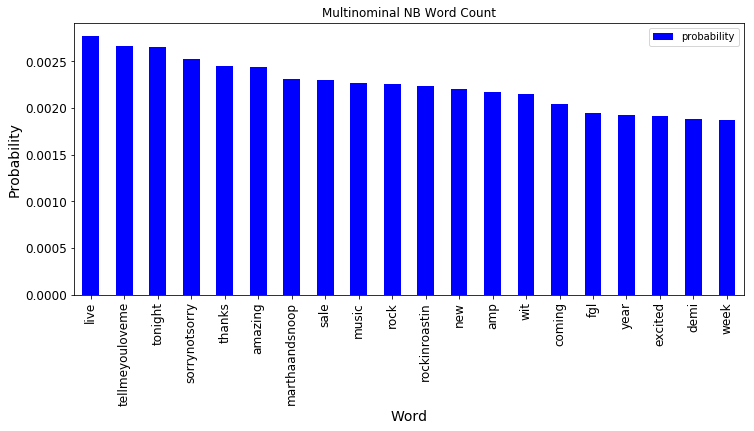

In [136]:
word_probability= {}
for word, probability in zip(vectorizer.get_feature_names(), multinb.feature_log_prob_):
    word_probability[word] = count
    
word_probability = pd.DataFrame.from_dict(forest_feats, orient='index').rename(columns={0:'probability'})
word_probability.sort_values(by='probability', ascending = False)[40:60].plot(kind = 'bar',             
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = 'blue',
                                                                           title = 'Multinominal NB Word Count')
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.show()

### III) Logistic Regression Algorithm

In [87]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the vectorized training tweets
logreg.fit(X_train_t, y_train)

# Let's do some predictio

y_pred_logreg = logreg.predict(X_test_t)

# check prediction
y_pred_logreg[:20]

array([4, 4, 2, 2, 3, 2, 2, 4, 1, 4, 3, 4, 4, 2, 1, 1, 1, 1, 2, 3])

In [88]:
# Cross validate the prediction accuracy score for using LogisticRegression

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(logreg, X_test_t, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('the Logistic Regression prediction accuracy score is: '  + str(accuracy_score))

the Logistic Regression prediction accuracy score is: 0.900657268175


In [89]:
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)

confusion_matrix_logreg = pd.DataFrame(confusion_logreg, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_logreg

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,947,1,11,13
Actual: 2,12,911,15,7
Actual: 3,38,10,892,63
Actual: 4,52,7,33,833


### IIII) Raindom Forest Classifier Algorithm

In [93]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the vectorized training tweets
forest.fit(X_train_t, y_train)

# Let's do some prediction

y_pred_forest = forest.predict(X_test_t)

# check prediction
y_pred_forest[:20]

array([4, 4, 2, 2, 3, 2, 2, 4, 1, 4, 3, 4, 4, 2, 1, 1, 1, 1, 2, 3])

In [95]:
# Cross validate the prediction accuracy score for using Randomtree

from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(forest, X_test_t, y_test, cv = 10)
accuracy_score = accuracy_score.mean()
print ('The Random Forst Classifier prediction accuracy score is: '  + str(accuracy_score))

The Random Forst Classifier prediction accuracy score is: 0.869694259543


In [97]:
confusion_forest = confusion_matrix(y_test, y_pred_forest)

confusion_matrix_forest = pd.DataFrame(confusion_forest, index = ['Actual: 1', 'Actual: 2', 'Actual: 3', 'Actual: 4'],
                               columns = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4'])
confusion_matrix_forest

,Predicted: 1,Predicted: 2,Predicted: 3,Predicted: 4
Actual: 1,934,3,23,12
Actual: 2,13,894,22,16
Actual: 3,38,27,872,66
Actual: 4,47,17,78,783


## 3) Sentiment Analysis

In [104]:
import matplotlib.pyplot as plt

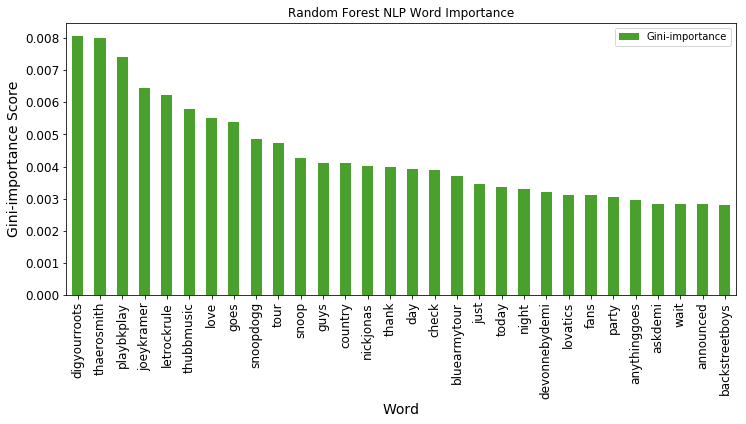

In [121]:
forest_feats= {}
for feature, importance in zip(vectorizer.get_feature_names(), forest.feature_importances_):
    forest_feats[feature] = importance
    
forest_feat_importances = pd.DataFrame.from_dict(forest_feats, orient='index').rename(columns={0:'Gini-importance'})
forest_feat_importances.sort_values(by='Gini-importance', ascending = False)[10:40].plot(kind = 'bar', 
                                                                            rot = 90,               
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = '#4AA02C',
                                                                           title = 'Random Forest NLP Word Importance')
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)
plt.show()

In [123]:
forest_feat_importances.sort_values(by='Gini-importance', ascending = False)[51:100]


,Gini-importance
new,0.002199
amp,0.002173
wit,0.002145
coming,0.002041
fgl,0.001946
year,0.001929
excited,0.001909
demi,0.001881
week,0.001873
weekend,0.001848


In [ ]:
emoji_count = defaultdict(int)
for i in tweets['text']:
    for emoji in re.findall(u'[\U0001f525]', i):
        emoji_count[emoji] +=1
        
print(emoji_count)        
    

In [ ]:
unicode('🔥 ', 'utf-8')

In [ ]:
import re
import sys

In [ ]:
emoji_count = defaultdict(int)
for i in tweets['text']:
    for emoji in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', i):
        emoji_count[emoji] += 1

print (emoji_count)